<font size=5 > Which Factors Influence the Demand for Shared Bikes? 

## Step 1: Reading and Understanding the Data

In [78]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Importing libraries
import pandas as pd
import numpy as np


In [80]:
# reading the csv
df = pd.read_csv('day.csv', index_col='instant')

In [81]:
# inspecting the head
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822


In [82]:
# inspecting the head
df.tail(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [83]:
# inspecting the columns
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [84]:
# convert weatherfit into categorical string values


# Create a mapping dictionary
weather_mapping = {
    1: 'Clear_Partly_Cloudy',
    2: 'Mist_Cloudy',
    3: 'Light_Snow_Rain',
    4: 'Heavy_Rain_Snow'
}

# Apply the mapping to the 'weathersit' column
df['weathersit'] = df['weathersit'].map(weather_mapping)

# Verify the conversion
print(df['weathersit'].head())


instant
1            Mist_Cloudy
2            Mist_Cloudy
3    Clear_Partly_Cloudy
4    Clear_Partly_Cloudy
5    Clear_Partly_Cloudy
Name: weathersit, dtype: object


In [85]:
# Converting seasons into categorical string mapping

season_mapping = {
    1: 'spring', 
    2: 'summer', 
    3: 'fall',  
    4: 'winter'
}

# Apply the mapping to the 'weathersit' column
df['season'] = df['season'].map(season_mapping)

# Verify the conversion
print(df['season'].head())

instant
1    spring
2    spring
3    spring
4    spring
5    spring
Name: season, dtype: object


In [86]:
# Dropping 'casual', 'registered' columns that are used to calculate target column cnt
df = df.drop(columns=['casual', 'registered'])

# Verify the columns have been dropped
print(df.columns)



Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


In [87]:
# assessing whether there are any columns with empty variables and column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 79.8+ KB


In [88]:
# Adding a derived columns that may be better predictors than individual columns


# Temperature and Humidity Interaction:
df['temp_hum_interaction'] = df['temp'] * df['hum']

# Create a binary column indicating whether a day is a weekend:
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Creating a lagged variable if Bike rentals on a given day could depend on the number of rentals on the previous day. 
df['lagged_cnt'] = df['cnt'].shift(1)


## Step 2: Visualising the Data

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
sns.pairplot(df, height=2)
plt.show()

## Step 3: Data Preparation

In [91]:
# creating dummy variables for categorical columns
df = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first=True)


In [92]:
# inspecting head after adding dummy variables
df.head(10)


,dteday,temp,atemp,hum,windspeed,cnt,temp_hum_interaction,is_weekend,lagged_cnt,season_spring,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,14.110847,18.18125,80.5833,10.749882,985,1137.098617,1,NaN,1,...,0,0,0,0,0,0,1,0,0,1
2,02-01-2018,14.902598,17.68695,69.6087,16.652113,801,1037.350473,1,985.0,1,...,0,0,0,0,0,0,0,0,0,1
3,03-01-2018,8.050924,9.47025,43.7273,16.636703,1349,352.045169,0,801.0,1,...,0,1,0,0,0,0,0,1,0,0
4,04-01-2018,8.200000,10.60610,59.0435,10.739832,1562,484.156700,0,1349.0,1,...,0,0,1,0,0,0,0,1,0,0
5,05-01-2018,9.305237,11.46350,43.6957,12.522300,1600,406.598844,0,1562.0,1,...,0,0,0,1,0,0,0,1,0,0
6,06-01-2018,8.378268,11.66045,51.8261,6.000868,1606,434.212955,0,1600.0,1,...,0,0,0,0,1,0,0,1,0,0
7,07-01-2018,8.057402,10.44195,49.8696,11.304642,1510,401.819415,0,1606.0,1,...,0,0,0,0,0,1,0,1,0,1
8,08-01-2018,6.765000,8.11270,53.5833,17.875868,959,362.491024,1,1510.0,1,...,0,0,0,0,0,0,1,0,0,1
9,09-01-2018,5.671653,5.80875,43.4167,24.250650,822,246.244457,1,959.0,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'temp_hum_interaction', 'is_weekend', 'lagged_cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [94]:
# Check if 'dteday' is in the DataFrame columns
if 'dteday' in df.columns:
    df = df.drop(columns=['dteday'])
else:
    print("'dteday' column not found in DataFrame")



In [95]:
# inspecting columns after adding dummy variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        730 non-null    float64
 1   atemp                       730 non-null    float64
 2   hum                         730 non-null    float64
 3   windspeed                   730 non-null    float64
 4   cnt                         730 non-null    int64  
 5   temp_hum_interaction        730 non-null    float64
 6   is_weekend                  730 non-null    int64  
 7   lagged_cnt                  729 non-null    float64
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  yr_1                        730 non-null    uint8  
 12  mnth_2                      730 non-null    uint8  
 13  mnth_3                      730 non

In [96]:
# Display columns with NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

# Optionally, you can also see the number of NaNs in each of these columns
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print(nan_counts)


Columns with NaN values: ['lagged_cnt']
lagged_cnt    1
dtype: int64


In [97]:
# Drop the row with NaN in the 'lagged_cnt' column
df = df.dropna(subset=['lagged_cnt'])

# Verify that the NaN row has been dropped
print(df.isna().sum())  # This should show 0 NaNs in 'lagged_cnt'


temp                          0
atemp                         0
hum                           0
windspeed                     0
cnt                           0
temp_hum_interaction          0
is_weekend                    0
lagged_cnt                    0
season_spring                 0
season_summer                 0
season_winter                 0
yr_1                          0
mnth_2                        0
mnth_3                        0
mnth_4                        0
mnth_5                        0
mnth_6                        0
mnth_7                        0
mnth_8                        0
mnth_9                        0
mnth_10                       0
mnth_11                       0
mnth_12                       0
holiday_1                     0
weekday_1                     0
weekday_2                     0
weekday_3                     0
weekday_4                     0
weekday_5                     0
weekday_6                     0
workingday_1                  0
weathers

## Step 4: Splitting the Data into Training and Testing Sets


In [98]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Using MinMax scaling.

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
# list of columns that should be scaled (excluding dummy' variables)

num_vars = [
    'temp', 
    'atemp', 
    'hum', 
    'windspeed', 
    'cnt', 
    'temp_hum_interaction', 
    'lagged_cnt'
]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,hum,windspeed,cnt,temp_hum_interaction,is_weekend,lagged_cnt,season_spring,season_summer,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
627,0.614763,0.635584,0.557576,0.432979,0.864257,0.497830,0,0.466061,0,0,...,0,0,0,1,0,0,0,1,0,0
365,0.437201,0.461603,0.639826,0.445450,0.247069,0.423926,1,0.342499,1,0,...,0,0,0,0,0,0,1,0,0,0
427,0.442393,0.460736,0.645455,0.297488,0.438172,0.432002,1,0.364933,1,0,...,0,0,0,0,0,0,1,0,0,1
729,0.245101,0.210280,0.502164,0.772556,0.163786,0.207609,1,0.151749,1,0,...,0,0,0,0,0,0,0,0,0,0
483,0.395666,0.411155,0.508658,0.219584,0.456787,0.309619,1,0.714565,0,1,...,0,0,0,0,0,0,1,0,0,1


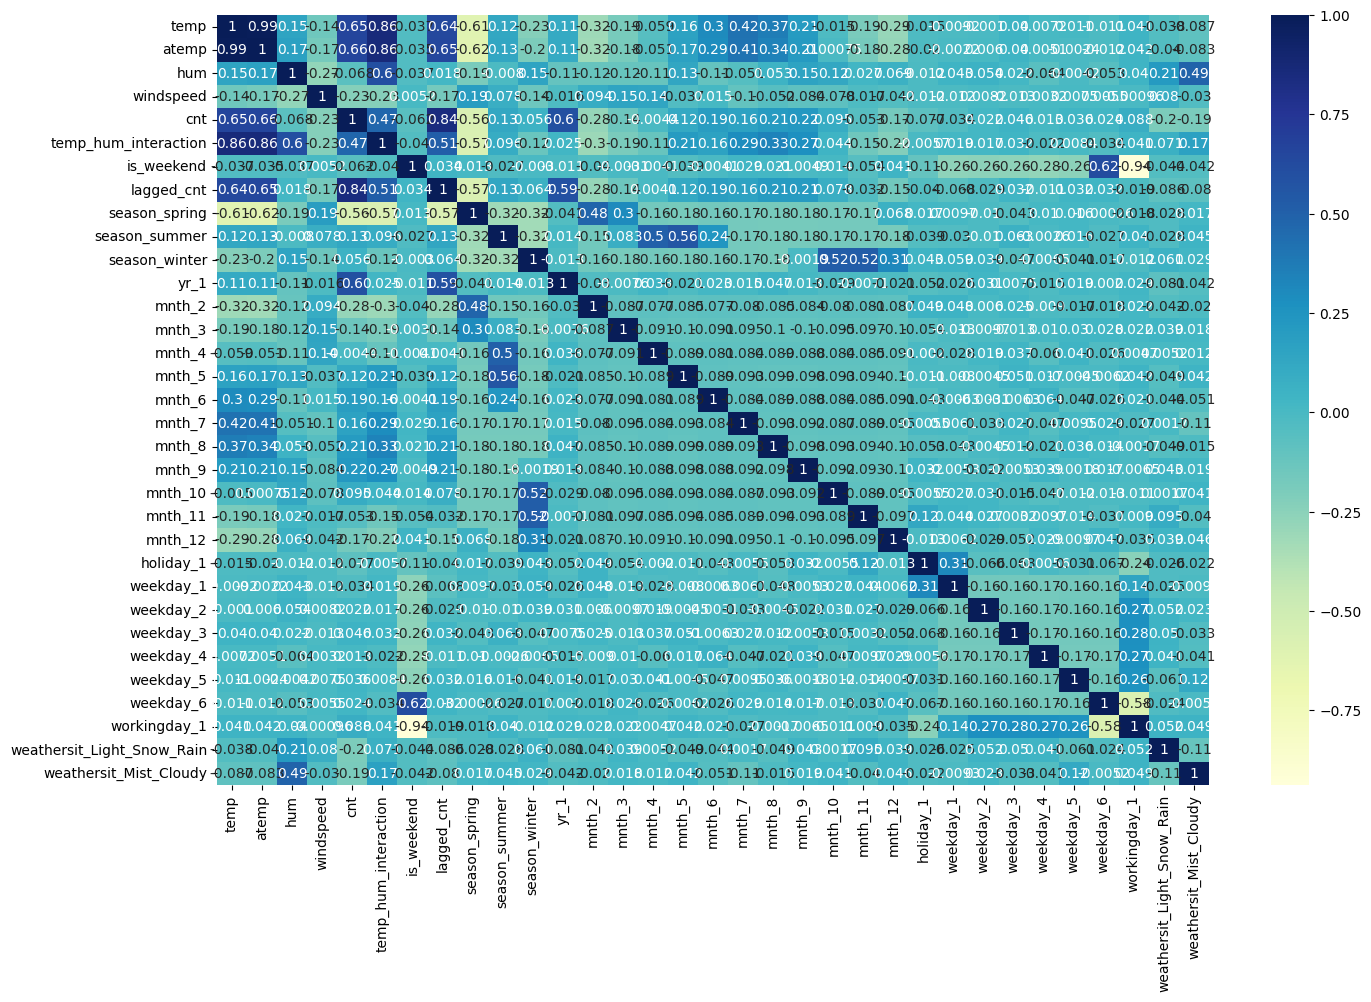

In [101]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [102]:
y_train = df_train.pop('cnt')
X_train = df_train
df_train

,temp,atemp,hum,windspeed,temp_hum_interaction,is_weekend,lagged_cnt,season_spring,season_summer,season_winter,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
627,0.614763,0.635584,0.557576,0.432979,0.497830,0,0.466061,0,0,0,...,0,0,0,1,0,0,0,1,0,0
365,0.437201,0.461603,0.639826,0.445450,0.423926,1,0.342499,1,0,0,...,0,0,0,0,0,0,1,0,0,0
427,0.442393,0.460736,0.645455,0.297488,0.432002,1,0.364933,1,0,0,...,0,0,0,0,0,0,1,0,0,1
729,0.245101,0.210280,0.502164,0.772556,0.207609,1,0.151749,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,0.395666,0.411155,0.508658,0.219584,0.309619,1,0.714565,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.880586,0.886965,0.667532,0.434525,0.826134,0,0.832835,0,0,0,...,0,0,0,0,0,1,0,1,0,1
55,0.294718,0.289486,0.724562,0.521446,0.346179,0,0.218017,1,0,0,...,0,0,0,0,1,0,0,1,0,1
352,0.223295,0.229401,0.609091,0.319279,0.234591,1,0.312586,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a linear model

Using LinearRegression function from SciKit Learn with RFE 

#### RFE

In [103]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [104]:
# Initialize the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Set up RFE to select 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

In [105]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 18),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('temp_hum_interaction', True, 1),
 ('is_weekend', False, 8),
 ('lagged_cnt', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 15),
 ('mnth_3', False, 2),
 ('mnth_4', False, 5),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 10),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 11),
 ('holiday_1', False, 7),
 ('weekday_1', False, 16),
 ('weekday_2', False, 13),
 ('weekday_3', False, 14),
 ('weekday_4', False, 17),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [106]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'temp_hum_interaction', 'lagged_cnt',
       'season_spring', 'season_winter', 'yr_1', 'mnth_5', 'mnth_9', 'mnth_10',
       'weekday_6', 'workingday_1', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [107]:
X_train.columns[~rfe.support_]

Index(['atemp', 'is_weekend', 'season_summer', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [108]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [109]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [110]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [111]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.61e-201
Time:                        07:44:20   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -937.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

temp_hum_interaction is insignificant in presence of other variables; can be dropped

In [112]:
X_train_new = X_train_rfe.drop(["temp_hum_interaction"], axis = 1)

#### Rebuilding the model with temp_hum_interaction

In [113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [114]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'lagged_cnt', 'season_spring',
       'season_winter', 'yr_1', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'workingday_1', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [115]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [116]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [117]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     220.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.71e-202
Time:                        07:44:20   Log-Likelihood:                 518.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [118]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,lagged_cnt,24.22
0,temp,23.23
1,hum,22.63
6,yr_1,4.45
11,workingday_1,4.39
2,windspeed,4.12
5,season_winter,3.04
4,season_spring,2.83
13,weathersit_Mist_Cloudy,2.22
10,weekday_6,1.66


## Residual Analysis of the train data

Checking if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).

In [119]:
y_train_price = lm.predict(X_train_lm)

In [120]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

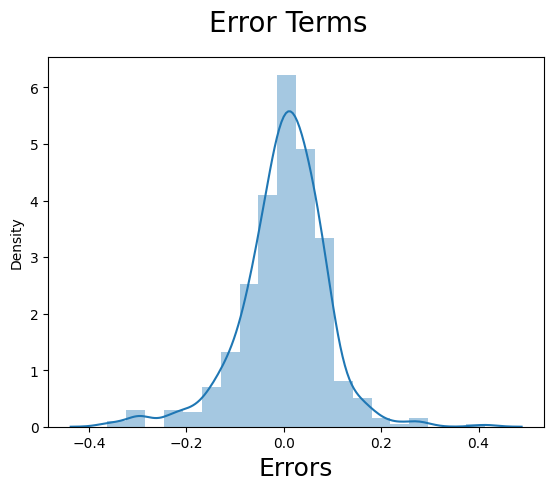

In [121]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Conclusion: The errors look roughly normally distributed, and acceptable to move on to the next step

## Making Predictions

In [122]:
# list of columns that should be scaled (excluding dummy' variables)

num_vars = [
    'temp', 
    'atemp', 
    'hum', 
    'windspeed', 
    'cnt', 
    'temp_hum_interaction', 
    'lagged_cnt'
]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [123]:
y_test = df_test.pop('cnt')
X_test = df_test

In [124]:
X_train_new.columns

Index(['temp', 'hum', 'windspeed', 'lagged_cnt', 'season_spring',
       'season_winter', 'yr_1', 'mnth_5', 'mnth_9', 'mnth_10', 'weekday_6',
       'workingday_1', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [125]:
X_test


,temp,atemp,hum,windspeed,temp_hum_interaction,is_weekend,lagged_cnt,season_spring,season_summer,season_winter,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
instant,,,,,,,,,,,,,,,,,,,,,
186,0.856704,0.850415,0.613420,0.210274,0.740166,0,0.692706,0,0,0,...,0,0,1,0,0,0,0,1,0,0
640,0.662528,0.638242,0.905628,0.155716,0.864687,0,0.777266,0,0,1,...,0,0,1,0,0,0,0,1,1,0
301,0.338555,0.330295,0.608658,0.468806,0.325406,0,0.303382,0,0,1,...,0,0,0,0,0,1,0,1,0,1
223,0.820361,0.788671,0.440260,0.306798,0.510476,0,0.547400,0,0,0,...,0,0,0,0,1,0,0,1,0,0
154,0.698871,0.699963,0.367966,0.528020,0.368675,0,0.569029,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.257562,0.255498,0.714719,0.334850,0.307035,1,0.323286,1,0,0,...,0,0,0,0,0,0,0,0,0,1
419,0.492235,0.503382,0.576190,0.372212,0.422888,0,0.546595,1,0,0,...,0,0,0,0,1,0,0,1,0,0
129,0.589842,0.614701,0.611688,0.334860,0.526374,0,0.495973,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [126]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [127]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

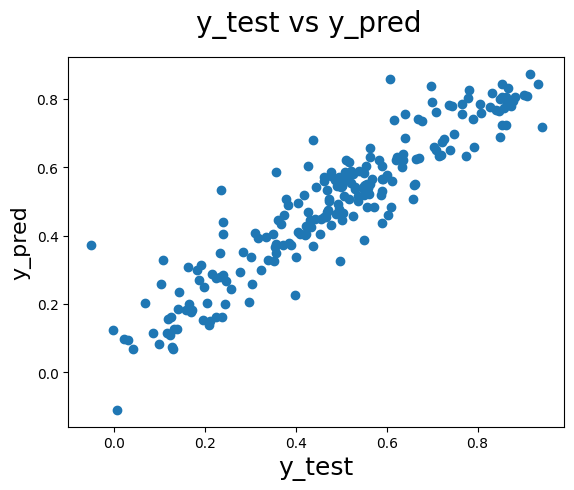

In [128]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [129]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8546534293418498